In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Cleaned Data

In [2]:
df = pd.read_excel("Cleaned_Bird_Monitoring_Data.xlsx")

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Dataset Overview

In [4]:
print("Total observations:", len(df))
print("Unique species:", df['Scientific_Name'].nunique())
print("Unique observers:", df['Observer'].nunique())
print("\nHabitat distribution:")
print(df['Location_Type'].value_counts())

Total observations: 17077
Unique species: 127
Unique observers: 3

Habitat distribution:
Location_Type
Forest       8546
Grassland    8531
Name: count, dtype: int64


## Temporal Analysis

### Yearly sightings

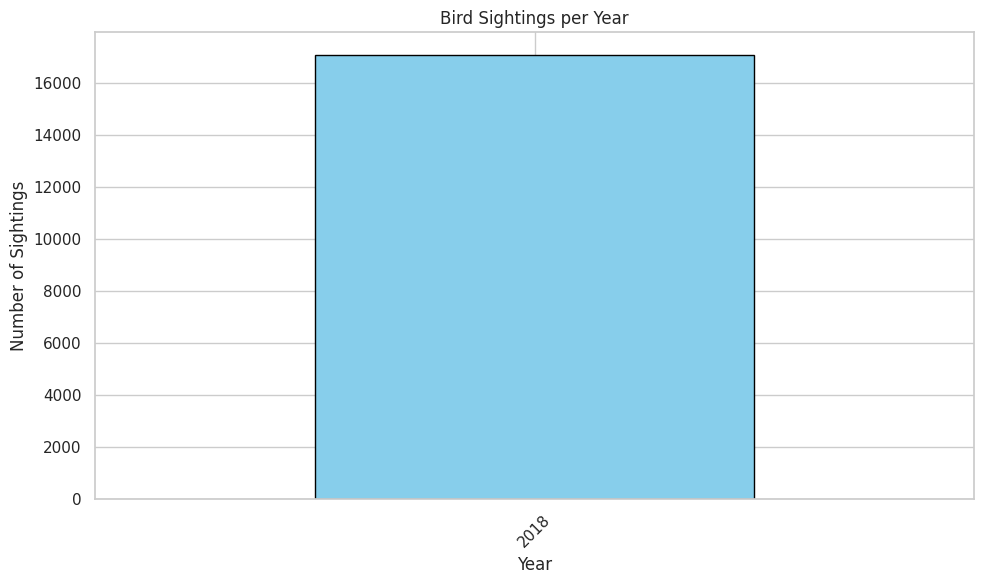

In [5]:
df.groupby("Year")["Scientific_Name"].count().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Bird Sightings per Year")
plt.xlabel("Year")
plt.ylabel("Number of Sightings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monthly trends

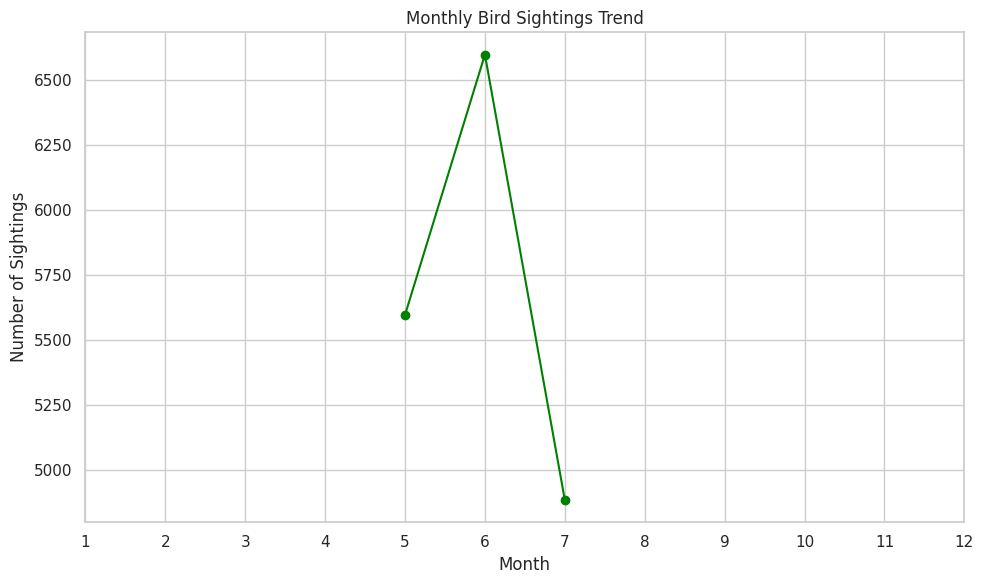

In [6]:
df['Month'] = df['Date'].dt.month
df.groupby("Month")["Scientific_Name"].count().plot(kind="line", marker="o", color="green")
plt.title("Monthly Bird Sightings Trend")
plt.xlabel("Month")
plt.ylabel("Number of Sightings")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

### Observation time patterns

/tmp/ipython-input-1524543971.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce').dt.time


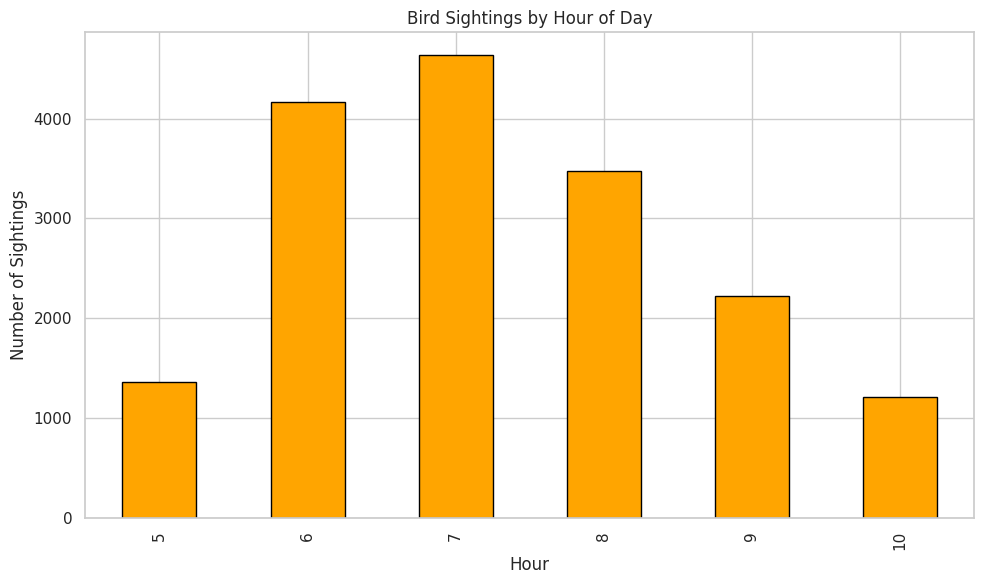

In [9]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce').dt.time
df['Hour'] = df['Start_Time'].apply(lambda t: t.hour if pd.notnull(t) else None)
df.groupby("Hour")["Scientific_Name"].count().plot(kind="bar", color="orange", edgecolor="black")
plt.title("Bird Sightings by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Sightings")
plt.tight_layout()
plt.show()

## Spatial Analysis

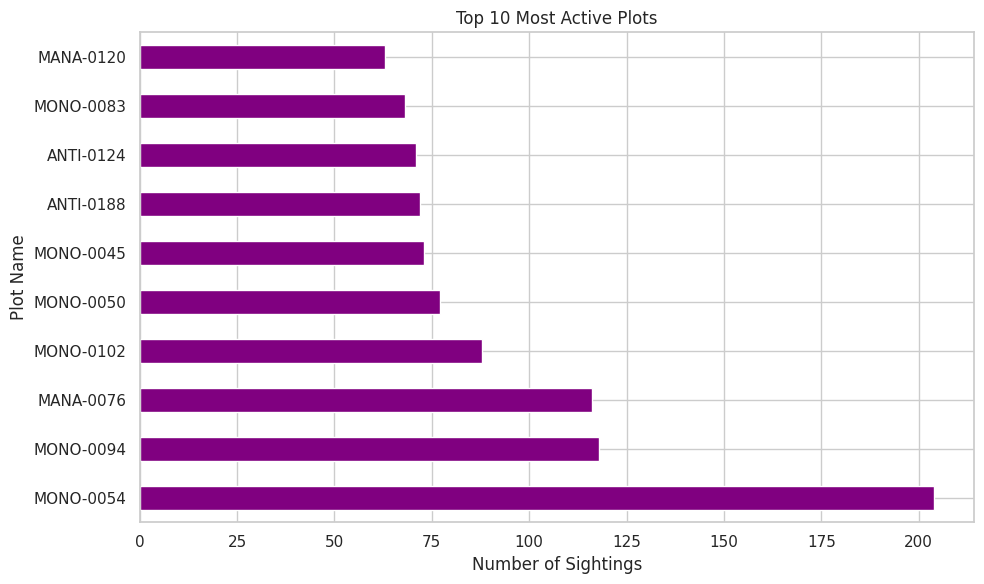

In [10]:
df['Plot_Name'].value_counts().head(10).plot(kind="barh", color="purple")
plt.title("Top 10 Most Active Plots")
plt.xlabel("Number of Sightings")
plt.ylabel("Plot Name")
plt.tight_layout()
plt.show()

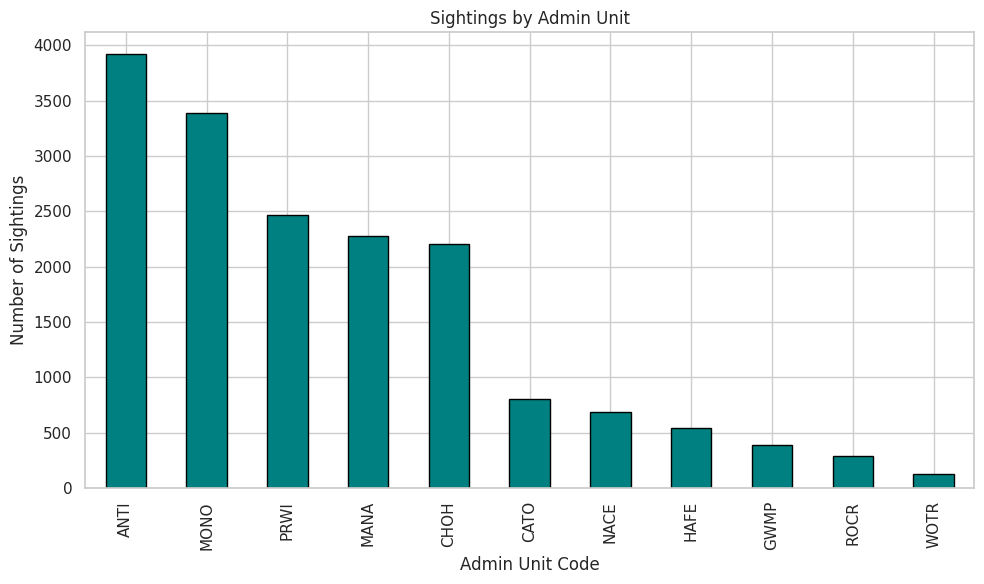

In [11]:
df['Admin_Unit_Code'].value_counts().plot(kind="bar", color="teal", edgecolor="black")
plt.title("Sightings by Admin Unit")
plt.xlabel("Admin Unit Code")
plt.ylabel("Number of Sightings")
plt.tight_layout()
plt.show()

## Species Insights

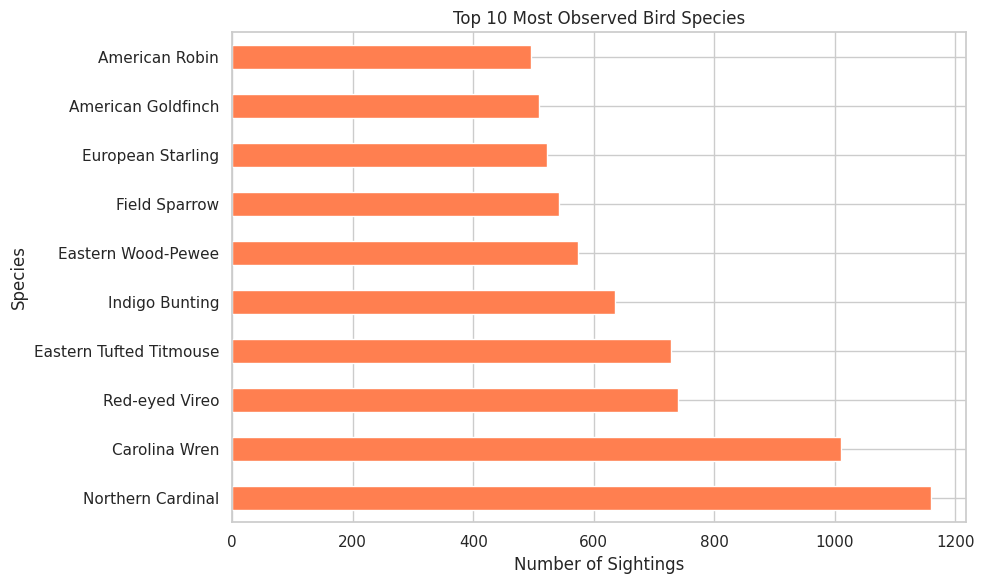

In [12]:
df['Common_Name'].value_counts().head(10).plot(kind="barh", color="coral")
plt.title("Top 10 Most Observed Bird Species")
plt.xlabel("Number of Sightings")
plt.ylabel("Species")
plt.tight_layout()
plt.show()

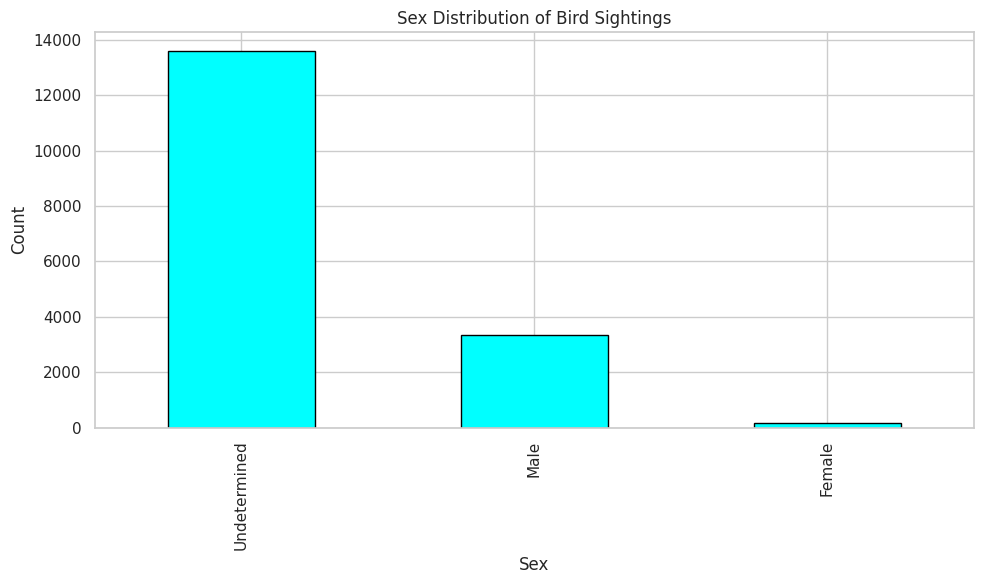

In [13]:
df['Sex'].value_counts().plot(kind="bar", color="cyan", edgecolor="black")
plt.title("Sex Distribution of Bird Sightings")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

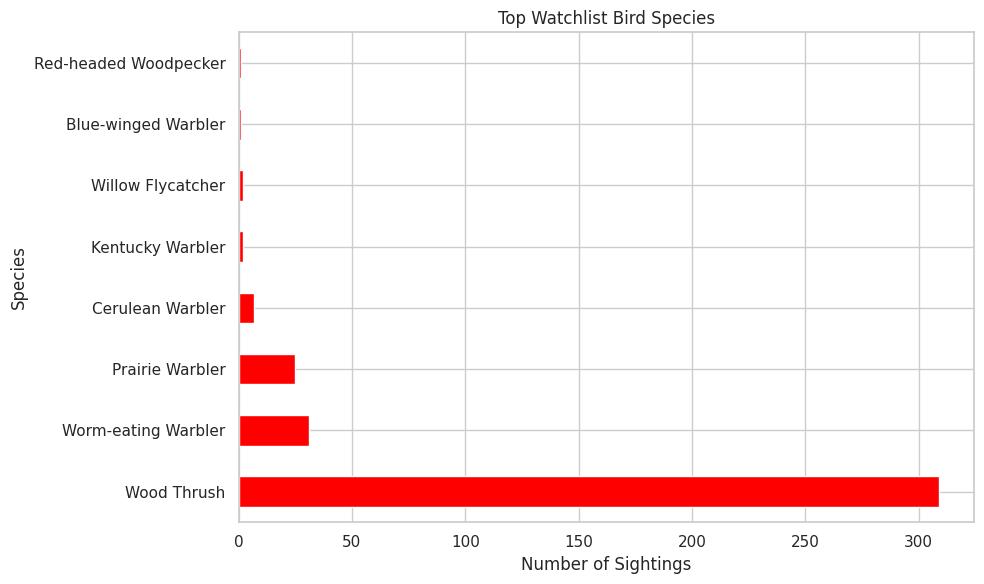

In [14]:
df[df['PIF_Watchlist_Status'] == True]['Common_Name'].value_counts().head(10).plot(kind="barh", color="red")
plt.title("Top Watchlist Bird Species")
plt.xlabel("Number of Sightings")
plt.ylabel("Species")
plt.tight_layout()
plt.show()


## Environmental Impact

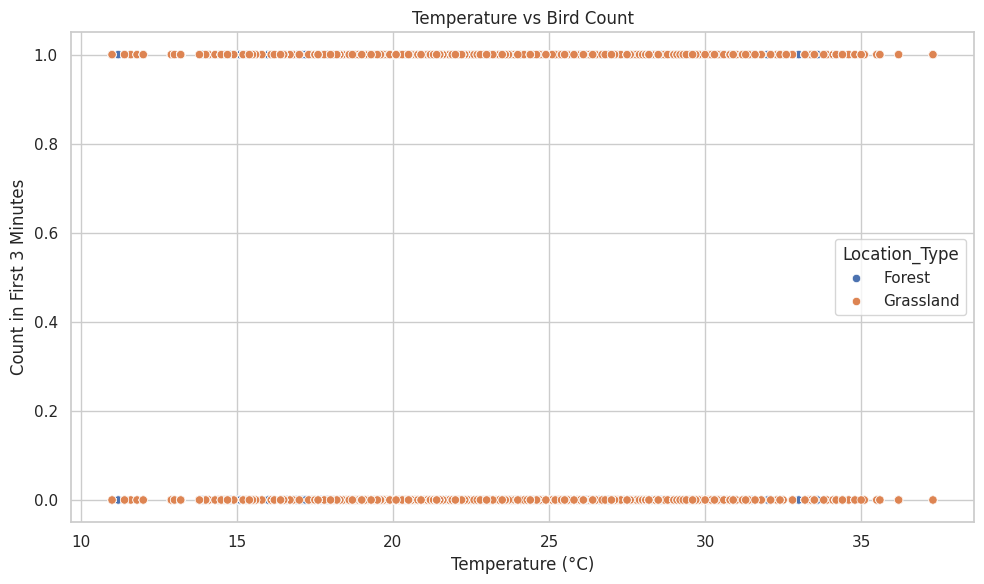

In [15]:
sns.scatterplot(data=df, x="Temperature", y="Initial_Three_Min_Cnt", hue="Location_Type")
plt.title("Temperature vs Bird Count")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count in First 3 Minutes")
plt.tight_layout()
plt.show()

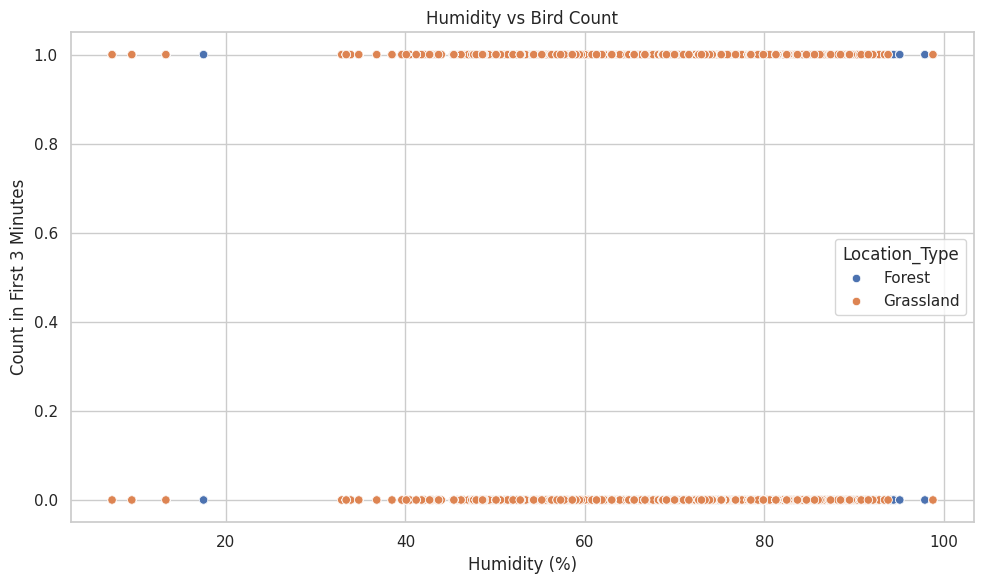

In [16]:
sns.scatterplot(data=df, x="Humidity", y="Initial_Three_Min_Cnt", hue="Location_Type")
plt.title("Humidity vs Bird Count")
plt.xlabel("Humidity (%)")
plt.ylabel("Count in First 3 Minutes")
plt.tight_layout()
plt.show()

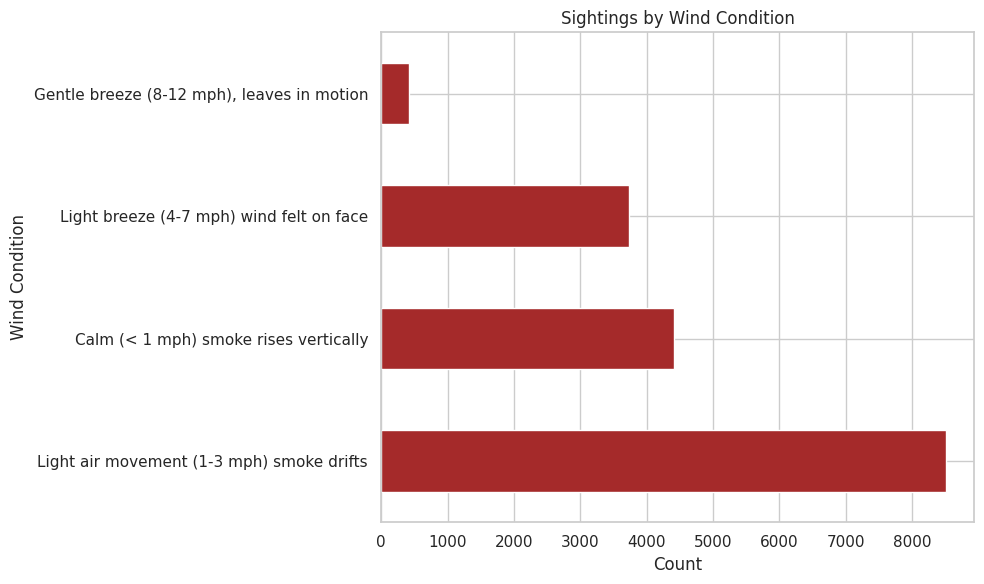

In [17]:
df['Wind'].value_counts().head(10).plot(kind="barh", color="brown")
plt.title("Sightings by Wind Condition")
plt.xlabel("Count")
plt.ylabel("Wind Condition")
plt.tight_layout()
plt.show()


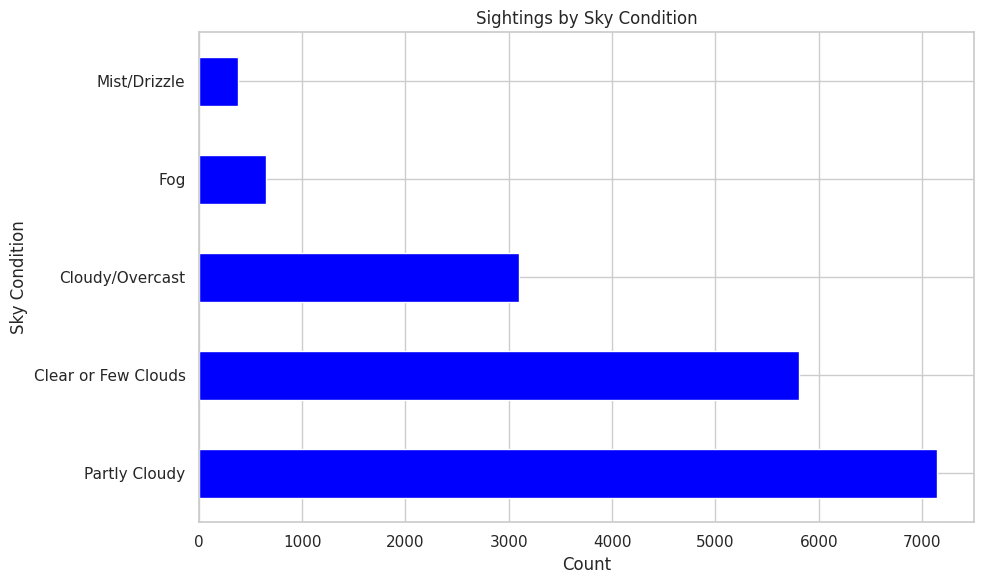

In [18]:
df['Sky'].value_counts().head(10).plot(kind="barh", color="blue")
plt.title("Sightings by Sky Condition")
plt.xlabel("Count")
plt.ylabel("Sky Condition")
plt.tight_layout()
plt.show()

## Distance & Behavior

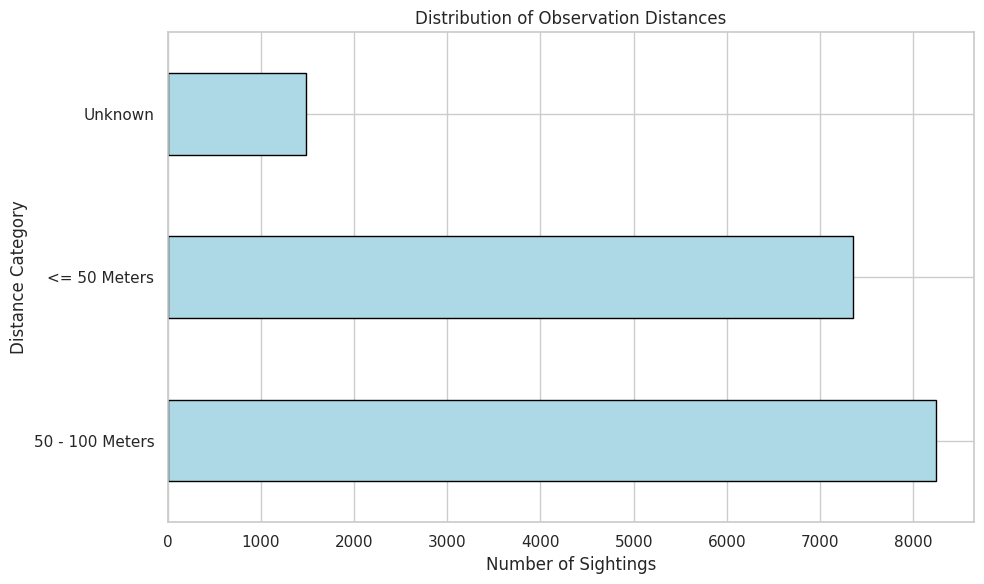

In [19]:
df['Distance'].value_counts().plot(kind="barh", color="lightblue", edgecolor="black")
plt.title("Distribution of Observation Distances")
plt.xlabel("Number of Sightings")
plt.ylabel("Distance Category")
plt.tight_layout()
plt.show()

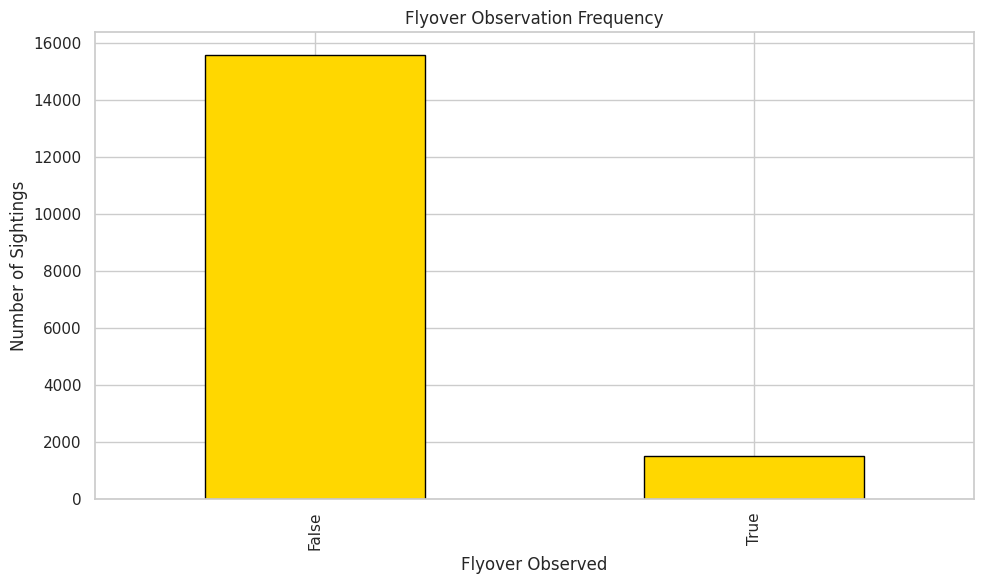

In [20]:
df['Flyover_Observed'].value_counts().plot(kind="bar", color="gold", edgecolor="black")
plt.title("Flyover Observation Frequency")
plt.xlabel("Flyover Observed")
plt.ylabel("Number of Sightings")
plt.tight_layout()
plt.show()

## Observer Trends

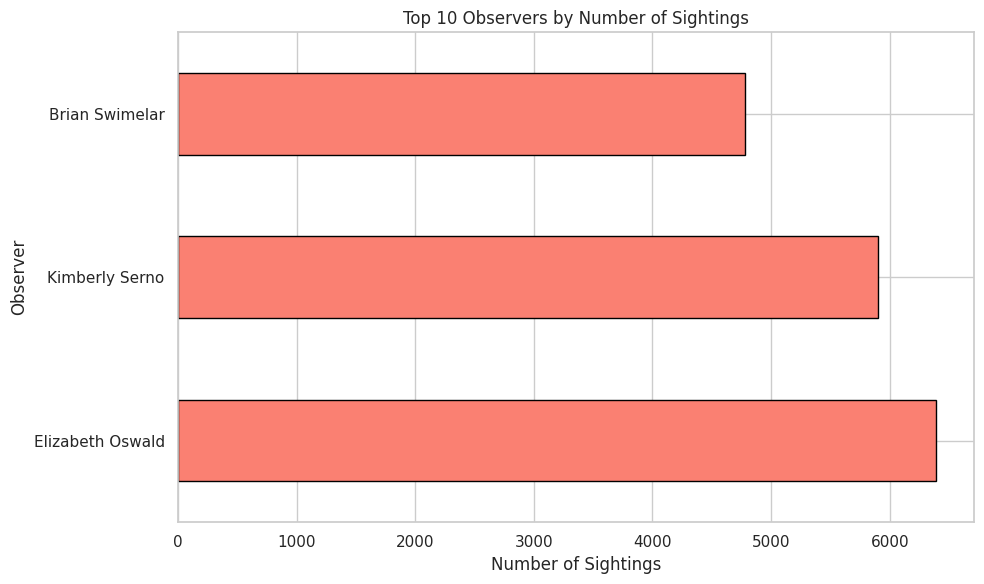

In [21]:
df['Observer'].value_counts().head(10).plot(kind="barh", color="salmon", edgecolor="black")
plt.title("Top 10 Observers by Number of Sightings")
plt.xlabel("Number of Sightings")
plt.ylabel("Observer")
plt.tight_layout()
plt.show()

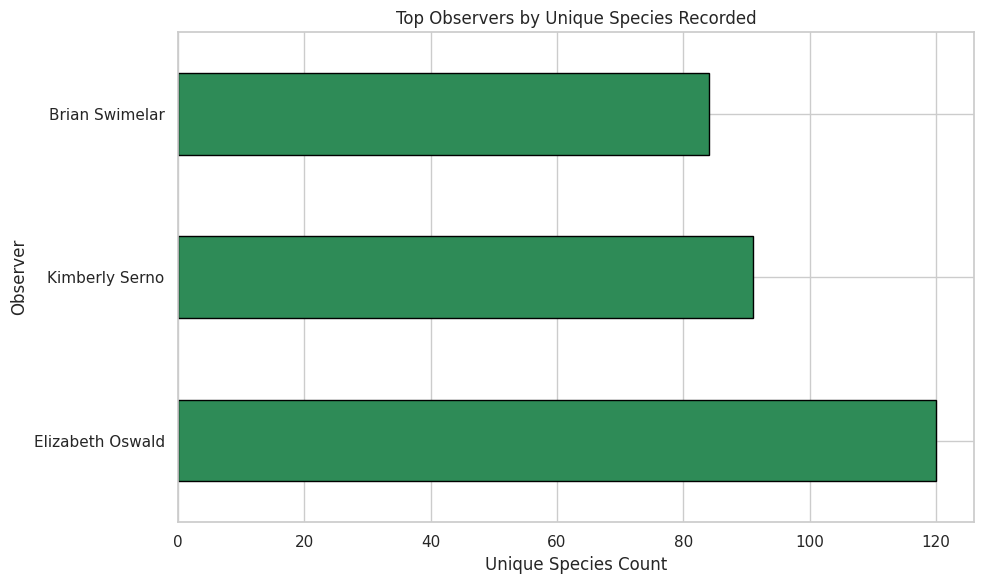

In [22]:
df.groupby('Observer')['Scientific_Name'].nunique().sort_values(ascending=False).head(10).plot(kind="barh", color="seagreen", edgecolor="black")
plt.title("Top Observers by Unique Species Recorded")
plt.xlabel("Unique Species Count")
plt.ylabel("Observer")
plt.tight_layout()
plt.show()

## Conservation Insights

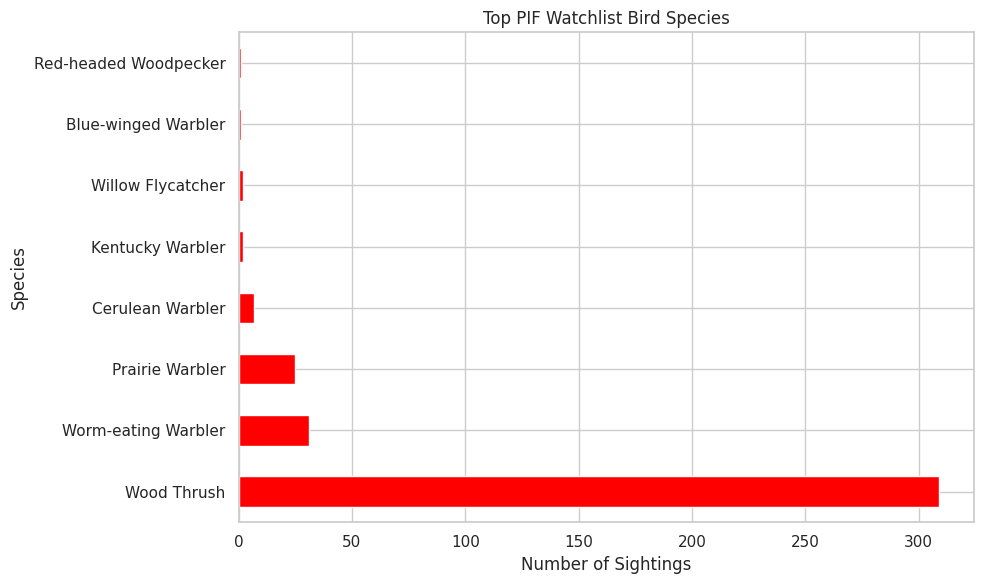

In [23]:
df[df['PIF_Watchlist_Status'] == True]['Common_Name'].value_counts().head(10).plot(kind="barh", color="red")
plt.title("Top PIF Watchlist Bird Species")
plt.xlabel("Number of Sightings")
plt.ylabel("Species")
plt.tight_layout()
plt.show()

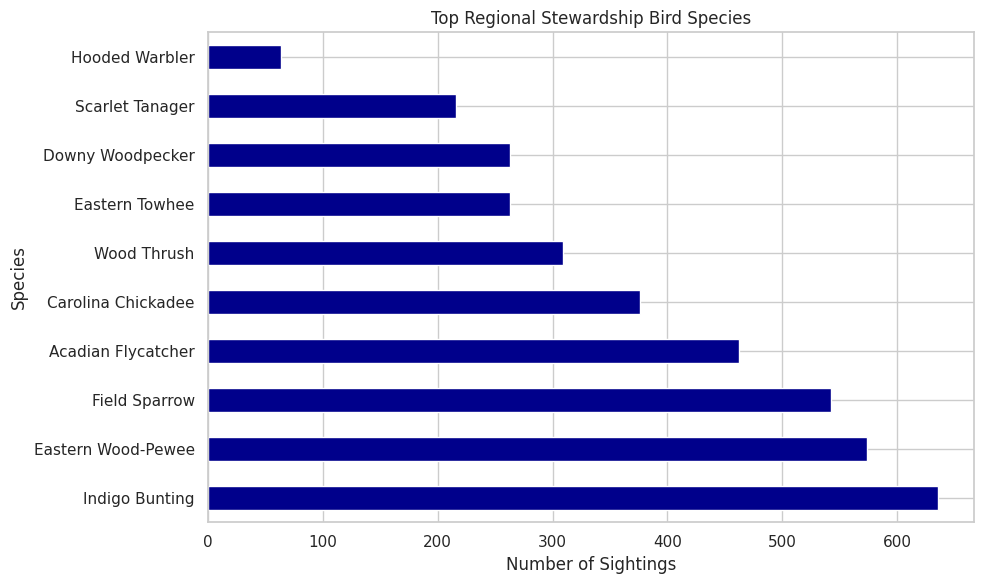

In [24]:
df[df['Regional_Stewardship_Status'] == True]['Common_Name'].value_counts().head(10).plot(kind="barh", color="darkblue")
plt.title("Top Regional Stewardship Bird Species")
plt.xlabel("Number of Sightings")
plt.ylabel("Species")
plt.tight_layout()
plt.show()

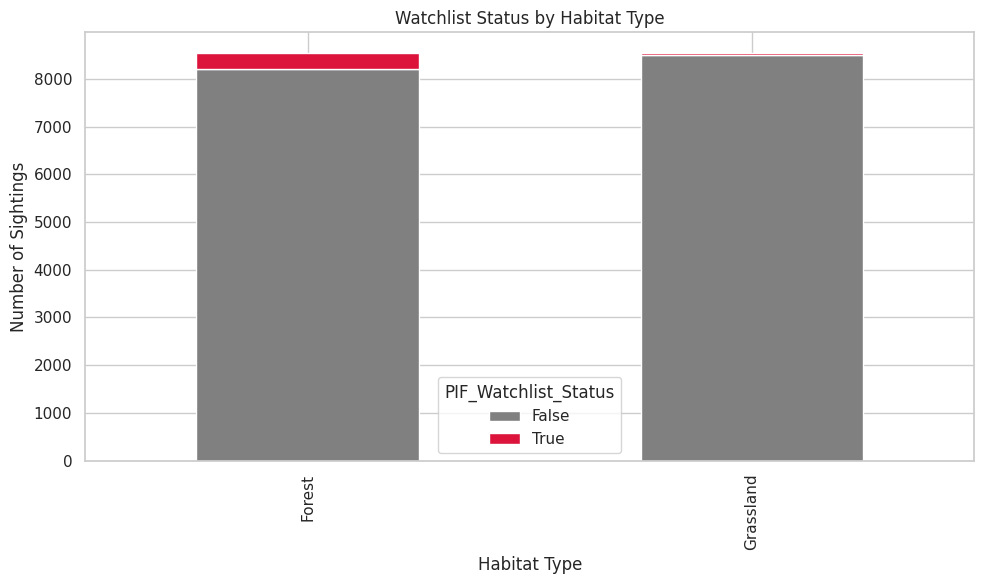

In [25]:
pd.crosstab(df['Location_Type'], df['PIF_Watchlist_Status']).plot(kind="bar", stacked=True, color=["grey", "crimson"])
plt.title("Watchlist Status by Habitat Type")
plt.xlabel("Habitat Type")
plt.ylabel("Number of Sightings")
plt.tight_layout()
plt.show()

In [26]:
print("\n✅ Full EDA completed. All charts displayed.")


✅ Full EDA completed. All charts displayed.
